#**GRIP @The Sparks Foundation**
##**Role : Data Science And Business Analytics Internship**
##**Author : Aditya Nair**
##**Task 4 : Stock Market Prediction using Numerical and Textual Analysis**

###***Task-Strategy: In this particular task we have been given the two datasets one related to stock prices and the other one is the news headlines.So now using these datasets we will be creating a hybrid model using different algorithms***

###***Technical-Stack Used ->Keras , NLTK ,Textblob , XGBoost , Pandas , Numpy , Scikit , Matplotlib***



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gamingsoul03/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/gamingsoul03/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


####**Step 1 : Import the Numerical stock price dataser and perform EDA**

In [ ]:
# Dataframe for exploratory analysis
stock_price_dataset_1=pd.read_csv('/home/gamingsoul03/Downloads/test/^BSESN.csv')
stock_price_dataset_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
1,2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
2,2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
3,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0
4,2019-10-23,39063.839844,39196.671875,38866.078125,39058.828125,39058.828125,41000.0


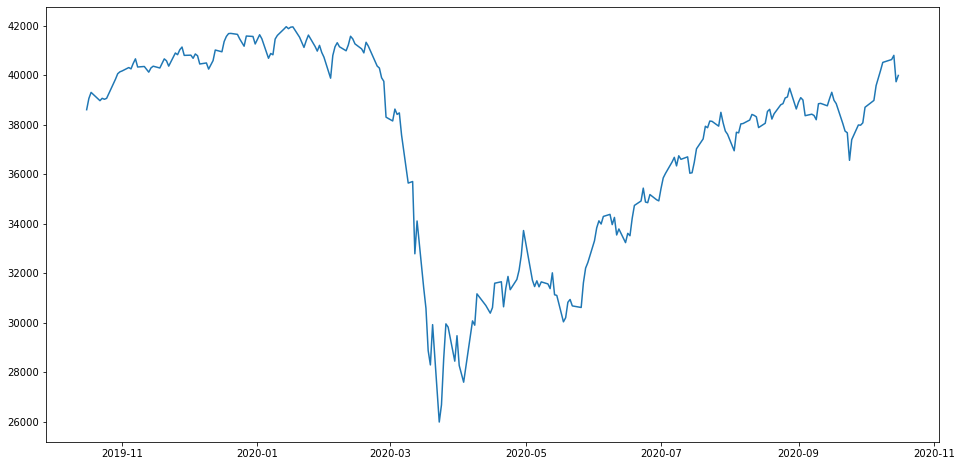

In [ ]:
# Extract date frame and plot closing stock price w.r.t time
stock_price_dataset_1['Date'] = pd.to_datetime(stock_price_dataset_1.Date,format='%Y-%m-%d')
stock_price_dataset_1.index = stock_price_dataset_1['Date']
stock_price_dataset_1.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(stock_price_dataset_1['Close'], label='Close Price history')

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

####**Step 2 : Create a dataframe for storing the closing stock data**

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(stock_price_dataset_2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(stock_price_dataset_2)-look_back-1):
		a = stock_price_dataset_2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(stock_price_dataset_2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [ ]:
stock_price_dataset_2 = pd.read_csv('/home/gamingsoul03/Downloads/test/^BSESN.csv', usecols=[5], engine='python')
stock_price_dataset_2.dropna(inplace=True)
stock_price_dataset_2 = stock_price_dataset_2.values
stock_price_dataset_2 = stock_price_dataset_2.astype('float32')

####**Step 3 : Normalize the data and split into train and test** 

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
stock_price_dataset_2 = scaler.fit_transform(stock_price_dataset_2)

# split into train and test sets
train_size = int(len(stock_price_dataset_2) * 0.67)
test_size = len(stock_price_dataset_2) - train_size
train, test = stock_price_dataset_2[0:train_size,:], stock_price_dataset_2[train_size:len(stock_price_dataset_2),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

####**Step 4 : Create an LSTM algorithm for numerical stock price and perform transformation** 

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
162/162 - 4s - loss: 0.2778
Epoch 2/100
162/162 - 0s - loss: 0.0372
Epoch 3/100
162/162 - 0s - loss: 0.0230
Epoch 4/100
162/162 - 0s - loss: 0.0136
Epoch 5/100
162/162 - 0s - loss: 0.0072
Epoch 6/100
162/162 - 0s - loss: 0.0043
Epoch 7/100
162/162 - 0s - loss: 0.0034
Epoch 8/100
162/162 - 0s - loss: 0.0032
Epoch 9/100
162/162 - 1s - loss: 0.0032
Epoch 10/100
162/162 - 0s - loss: 0.0031
Epoch 11/100
162/162 - 0s - loss: 0.0031
Epoch 12/100
162/162 - 0s - loss: 0.0033
Epoch 13/100
162/162 - 0s - loss: 0.0032
Epoch 14/100
162/162 - 0s - loss: 0.0032
Epoch 15/100
162/162 - 0s - loss: 0.0032
Epoch 16/100
162/162 - 0s - loss: 0.0031
Epoch 17/100
162/162 - 0s - loss: 0.0031
Epoch 18/100
162/162 - 0s - loss: 0.0031
Epoch 19/100
162/162 - 0s - loss: 0.0032
Epoch 20/100
162/162 - 0s - loss: 0.0031
Epoch 21/100
162/162 - 0s - loss: 0.0031
Epoch 22/100
162/162 - 0s - loss: 0.0031
Epoch 23/100
162/162 - 0s - loss: 0.0030
Epoch 24/100
162/162 - 0s - loss: 0.0031
Epoch 25/100
162/162 - 0s

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

####**Step 5 : Do the predictions,plot it and calculate the error**

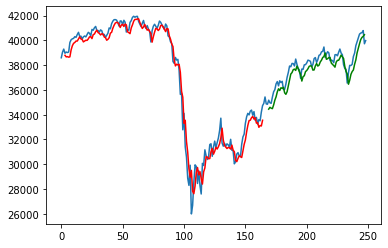

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(stock_price_dataset_2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(stock_price_dataset_2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(stock_price_dataset_2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(stock_price_dataset_2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")



Root mean square error =  764.2936718834806  RMSE
Root mean square error =  666.203355434787  RMSE


####**Step 6 : Import the Textual news data to create the hybrid model for numerical and textual analysis**

In [ ]:
#Text Analysis
columns = ['Date','Category','News']
india_news = pd.read_csv('/home/gamingsoul03/Downloads/test/india-news-headlines.csv', names = columns)
india_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


####**Step 7 : Text preprocessing and structuring**

In [ ]:
india_news.drop(0, inplace=True)
india_news.drop('Category', axis = 1, inplace=True)
india_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [ ]:
# Restructuring the date format
india_news['Date'] = pd.to_datetime(india_news['Date'],format= '%Y %m %d')
india_news

,Date,News
1,2001-01-01 00:00:00.000000000,win over cena satisfying but defeating underta...
2,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
4,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
5,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
...,...,...
3297168,1970-01-01 00:00:00.020200630,why tiktok removed 1 65 crore videos in india
3297169,1970-01-01 00:00:00.020200630,apurva asrani calls alia bhatts mother soni ra...
3297170,1970-01-01 00:00:00.020200630,kangana ranaut gets a doll version of herself ...
3297171,1970-01-01 00:00:00.020200630,meezaan jaffrey reminisces his childhood days ...


In [ ]:
#Grouping the headlines for each day
india_news['News'] = india_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
india_news = india_news.drop_duplicates() 
india_news.reset_index(inplace = True, drop = True)
india_news

,Date,News
0,2001-01-01 00:00:00.000000000,win over cena satisfying but defeating underta...
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...
3,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...
4,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...
...,...,...
7076,1970-01-01 00:00:00.020200626,Containment zone residents slam high prices ch...
7077,1970-01-01 00:00:00.020200627,like me i wont let you have a toxic relationsh...
7078,1970-01-01 00:00:00.020200628,Atanu Ghosh plans to rewrite old scripts to ma...
7079,1970-01-01 00:00:00.020200629,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
india_news['News']

0       win over cena satisfying but defeating underta...
1       Status quo will not be disturbed at Ayodhya; s...
2       Powerless north India gropes in the dark Think...
3       The string that pulled Stephen Hawking to Indi...
4       Light combat craft takes India into club class...
                              ...                        
7076    Containment zone residents slam high prices ch...
7077    like me i wont let you have a toxic relationsh...
7078    Atanu Ghosh plans to rewrite old scripts to ma...
7079    6 hot and stylish bikini looks of Katrina Kaif...
7080    Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
Name: News, Length: 7081, dtype: object

####**Step 8 : Add the subjectivity and polarity scores**

In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
india_news['Subjectivity'] = india_news['News'].apply(getSubjectivity)
india_news['Polarity'] = india_news['News'].apply(getPolarity)
india_news

,Date,News,Subjectivity,Polarity
0,2001-01-01 00:00:00.000000000,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
2,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462
3,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
4,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024
...,...,...,...,...
7076,1970-01-01 00:00:00.020200626,Containment zone residents slam high prices ch...,0.381841,0.068333
7077,1970-01-01 00:00:00.020200627,like me i wont let you have a toxic relationsh...,0.398808,0.079290
7078,1970-01-01 00:00:00.020200628,Atanu Ghosh plans to rewrite old scripts to ma...,0.402636,0.057636
7079,1970-01-01 00:00:00.020200629,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956


In [ ]:
india_news.shape

(7081, 4)

####**Step 9 : Visualize the scores created above by plotting them**

<AxesSubplot:>

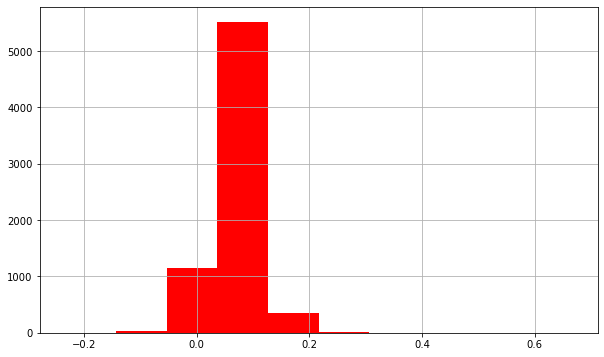

In [ ]:
plt.figure(figsize = (10,6))
india_news['Polarity'].hist(color = 'red')

<AxesSubplot:>

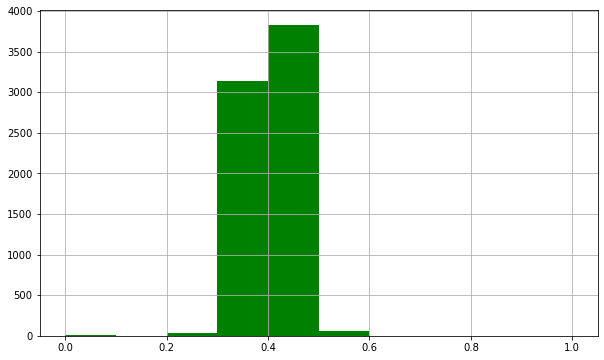

In [ ]:
plt.figure(figsize = (10,6))
india_news['Subjectivity'].hist(color = 'green')

####**Step 10 : Now its time for sentiment analysis over the news data**

In [ ]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

india_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in india_news['News']]
india_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in india_news['News']]
india_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in india_news['News']]
india_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in india_news['News']]
india_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01 00:00:00.000000000,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
2,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
3,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
4,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
...,...,...,...,...,...,...,...,...
7076,1970-01-01 00:00:00.020200626,Containment zone residents slam high prices ch...,0.381841,0.068333,-0.9999,0.163,0.748,0.089
7077,1970-01-01 00:00:00.020200627,like me i wont let you have a toxic relationsh...,0.398808,0.079290,-0.9999,0.159,0.749,0.092
7078,1970-01-01 00:00:00.020200628,Atanu Ghosh plans to rewrite old scripts to ma...,0.402636,0.057636,-0.9999,0.151,0.774,0.075
7079,1970-01-01 00:00:00.020200629,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956,-0.9999,0.144,0.770,0.086


####**Step 11 : Merge the numerical and textual data**

In [ ]:
merge = india_news
merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01 00:00:00.000000000,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
2,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
3,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
4,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
...,...,...,...,...,...,...,...,...
7076,1970-01-01 00:00:00.020200626,Containment zone residents slam high prices ch...,0.381841,0.068333,-0.9999,0.163,0.748,0.089
7077,1970-01-01 00:00:00.020200627,like me i wont let you have a toxic relationsh...,0.398808,0.079290,-0.9999,0.159,0.749,0.092
7078,1970-01-01 00:00:00.020200628,Atanu Ghosh plans to rewrite old scripts to ma...,0.402636,0.057636,-0.9999,0.151,0.774,0.075
7079,1970-01-01 00:00:00.020200629,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956,-0.9999,0.144,0.770,0.086


In [ ]:
merged_news = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
merged_news

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,0.282333,0.151333,-0.9811,0.122,0.807,0.071
2,0.407692,0.088462,-0.2640,0.122,0.766,0.111
3,0.446847,0.087961,0.8738,0.100,0.797,0.103
4,0.476612,0.262024,0.9769,0.124,0.719,0.157
...,...,...,...,...,...,...
7076,0.381841,0.068333,-0.9999,0.163,0.748,0.089
7077,0.398808,0.079290,-0.9999,0.159,0.749,0.092
7078,0.402636,0.057636,-0.9999,0.151,0.774,0.075
7079,0.396828,0.061956,-0.9999,0.144,0.770,0.086


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_merged_news = pd.DataFrame(sc.fit_transform(merged_news))
new_merged_news.columns = merged_news.columns
new_merged_news.index = merged_news.index
new_merged_news.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.633333,0.740741,0.50000,0.518018,0.473,0.488487
1,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
2,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
3,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
4,0.476612,0.550397,0.98845,0.279279,0.719,0.258224


In [ ]:
X = new_merged_news[0:249]
y =stock_price_dataset_1['Close']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(199, 6)

In [ ]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
108,0.405833,0.540833,0.02510,0.373874,0.734,0.164474
18,0.375486,0.391781,0.09990,0.364865,0.709,0.212171
205,0.433601,0.297440,0.00385,0.272523,0.772,0.175987
15,0.383333,0.339506,0.97700,0.171171,0.780,0.235197
71,0.344118,0.308279,0.00900,0.527027,0.607,0.259868
7,0.414653,0.237911,0.01105,0.272523,0.812,0.108553
228,0.358700,0.246596,0.00035,0.362613,0.772,0.111842
180,0.419285,0.357075,0.00065,0.270270,0.805,0.123355
146,0.750000,0.814815,0.83525,0.121622,0.765,0.297697
160,0.338659,0.281909,0.00045,0.362613,0.772,0.110197


####**Step 12 : Create adaboost and randomforest regressor and train them for hybrid analysis**

In [ ]:
randomforestmodel = RandomForestRegressor()
randomforestmodel.fit(x_train, y_train)
prediction=randomforestmodel.predict(x_test)

####**Step 13 : Now its time to evaluate our model for its accuracy and calculate its error**

In [ ]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

[35637.47937505 37218.77179679 38972.97589837 36244.14941413
 36480.75476793 39685.21935553 38489.90888673 35812.12826179
 38753.79585939 38405.40566422]
Date
2020-10-16    39982.980469
2020-06-25    34842.101563
2020-02-06    41306.031250
2020-06-01    33303.519531
2020-05-22    30672.589844
2020-02-03    39872.308594
2019-12-23    41642.660156
2020-06-12    33780.890625
2020-09-03    38990.941406
2020-08-27    39113.468750
Name: Close, dtype: float64
Root mean square error =  3959.473625488714  RMSE


In [ ]:
adaboostmodel = AdaBoostRegressor()
adaboostmodel.fit(x_train, y_train)
predictions = adaboostmodel.predict(x_test)

In [ ]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  4074.461310273298  RMSE


#**Conclusion :->As we can see that Random Forest Regressor performs a bit better than the Adaboost regressor as the RMSE of adboost is higher than that of Random Forest. Overall both these models have their errors on the higher side and the reason being that stock prices fluctuate a lot and  are highly unpredictable in nature. So from this we can conclude that we were able to succesfully build a hybrid model for the given problemset**